In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
train_set=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)

In [91]:
test_set=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows=1,header=None)

In [92]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [93]:
train_set.columns=col_labels
test_set.columns=col_labels

In [94]:
#Getting a glimpse of train data
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1


In [95]:
#Getting a Glimpse of test data
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
#Getting shape details of both train and test data
print('Train Dataset Shape: ',train_set.shape)
print('Test Dataset Shape: ',test_set.shape)

Train Dataset Shape:  (32561, 15)
Test Dataset Shape:  (16281, 15)


In [9]:
#Checking for NULL values
print('\n************************** TRAIN SET ***************************\n')
print(train_set.info())

print('\n************************** TEST SET ***************************\n')
print(test_set.info())


************************** TRAIN SET ***************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

********************

**No NULL values are present in train and test dataset, hence no need for imputation techniques.**

In [10]:
#Getting an idea of values distribution in train dataset
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
#Checking the type of output variable and identifying the type of problem
train_set['wage_class'].value_counts()

 <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64

**Above is a binary classification problem**

In [12]:
train_set['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [13]:
train_set['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

**Seems like few of the missing details are denoted by ?, so replacing the same with np.nan**

In [14]:
train_set.replace('\?',np.nan,regex=True,inplace=True)

In [15]:
train_set['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
#Three columns workclass,occupation,native_country seems to have NULL values. Lets get the percentage of NaN values in data.

In [18]:
nan_cnt=train_set[(train_set.workclass.isna())|(train_set.occupation.isna())|(train_set.native_country.isna())].count().max()

In [19]:
per_nan=nan_cnt/train_set.shape[0] * 100
print('Percentage of NaN values in dataset: ',per_nan,'%')

Percentage of NaN values in dataset:  7.367709836921471 %


In [20]:
#Null Values dropped
train_set.dropna(inplace=True)

In [21]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  wage_class      30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Working with categorical and non numeric data**

In [22]:
#Sex Feature

In [23]:
train_set.sex.value_counts()

 Male      20380
 Female     9782
Name: sex, dtype: int64

In [24]:
train_set['sex']=train_set['sex'].str.strip()
#label encoding
train_set['sex']=train_set['sex'].map({'Male':1,'Female':0})

In [25]:
train_set.sex.value_counts()

1    20380
0     9782
Name: sex, dtype: int64

In [26]:
#Feature: workclass

In [27]:
train_set['workclass']=train_set['workclass'].str.strip()
train_set.workclass.value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [28]:
df_workclass=pd.get_dummies(train_set['workclass'],drop_first=True,prefix='workclass',prefix_sep='_')

In [29]:
df_workclass.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [30]:
#Feature: marital_status

In [31]:
train_set['marital_status']=train_set['marital_status'].str.strip()
train_set['marital_status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital_status, dtype: int64

In [32]:
df_maritalst=pd.get_dummies(train_set['marital_status'],drop_first=True)

In [33]:
df_maritalst.head()

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [34]:
#Feature: relationship

In [35]:
train_set['relationship']=train_set['relationship'].str.strip()
train_set['relationship'].value_counts()

Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

In [36]:
df_rel=pd.get_dummies(train_set['relationship'],drop_first=True)

In [37]:
df_rel.head()

,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
#Feature: occupation
train_set['occupation']=train_set['occupation'].str.strip()
train_set['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [39]:
df_occ=pd.get_dummies(train_set['occupation'],drop_first=True)

In [40]:
df_occ.head()

,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [41]:
#Feature: race
train_set['race']=train_set['race'].str.strip()
train_set['race'].value_counts()

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

In [42]:
df_race=pd.get_dummies(train_set['race'],drop_first=True,prefix='race',prefix_sep='_')

In [43]:
df_race.head()

,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [44]:
#Feature: native_country

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

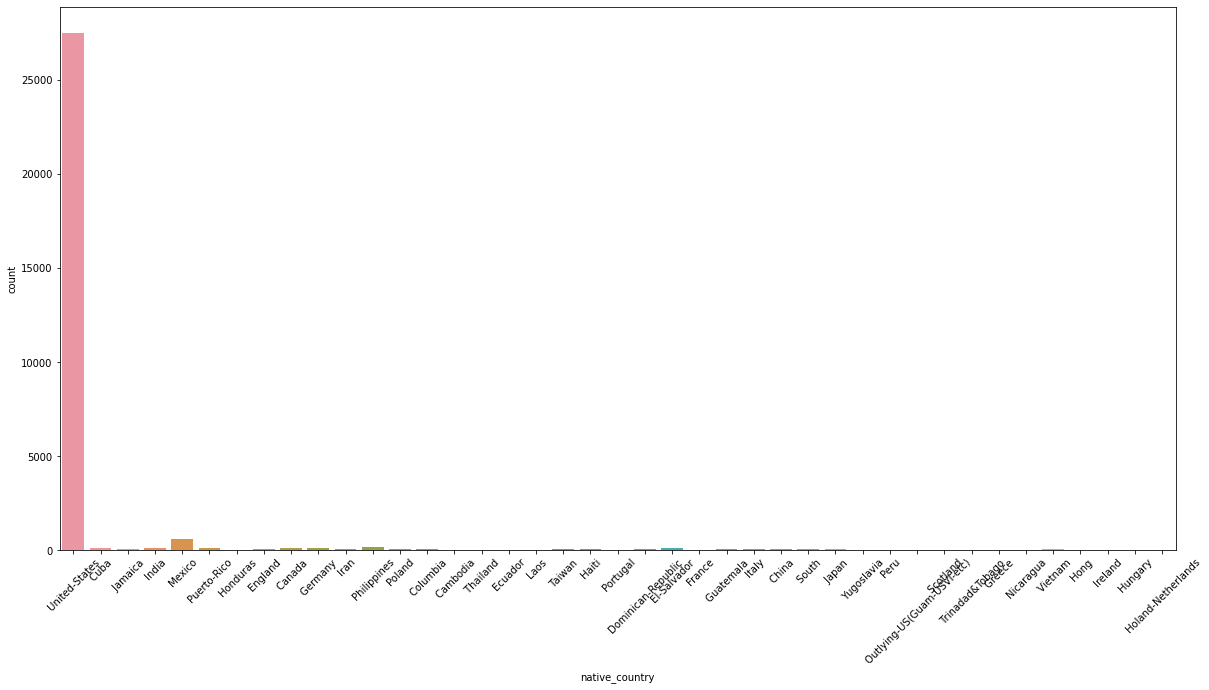

In [47]:
plt.figure(figsize=(20,10))
x=sns.countplot(x=train_set['native_country'])
x.set_xticklabels(labels=x.get_xticklabels(),rotation=45)
plt.show()

In [48]:
#Seems like native_country has ditribution of US much higher than other hence dividing it into US and Non-US and label encoding the same.

In [49]:
train_set['native_country']=train_set['native_country'].str.strip()
train_set['native_country']=train_set['native_country'].apply(lambda x:x if('United-States' in x) else 'Non-US')

In [50]:
train_set['native_country'].value_counts()

United-States    27504
Non-US            2658
Name: native_country, dtype: int64

In [51]:
train_set['native_country']=train_set['native_country'].map({'United-States':1,'Non-US':0})

In [52]:
train_set['native_country'].value_counts()

1    27504
0     2658
Name: native_country, dtype: int64

In [53]:
#Feature: wage_class

In [54]:
train_set['wage_class'].value_counts()

 <=50K    22654
 >50K      7508
Name: wage_class, dtype: int64

In [55]:
train_set['wage_class']=train_set['wage_class'].str.strip()

In [56]:
train_set['wage_class']=train_set['wage_class'].map({'<=50K':1,'>50K':0})

In [57]:
train_set['wage_class'].value_counts()

1    22654
0     7508
Name: wage_class, dtype: int64

In [58]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1


In [59]:
#Appending all new columns
new_df=pd.concat([train_set,df_workclass,df_maritalst,df_rel,df_occ,df_race],axis=1)

In [60]:
new_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving', 'race_Asian-Pac-Islander',
       'race_Black', 'race_Other', 'race_White'],
      dtype='object')

In [61]:
new_df=new_df.drop(columns=['workclass','education','marital_status','occupation','relationship','race'])

In [62]:
print(new_df.columns)
new_df.head()

Index(['age', 'fnlwgt', 'education_num', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'wage_class', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed',
       'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife',
       'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing',
       'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
       'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
       'Tech-support', 'Transport-moving', 'race_Asian-Pac-Islander',
       'race_Black', 'race_Other', 'race_White'],
      dtype='object')


,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,workclass_Local-gov,...,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,77516,13,1,2174,0,40,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,50,83311,13,1,0,0,13,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,1,0,0,40,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,53,234721,7,1,0,0,40,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,1,0,...,0,1,0,0,0,0,0,1,0,0


**All features are now converted to numerical once**

In [96]:
test_set.replace('\?',np.nan,regex=True,inplace=True)
test_set.dropna(inplace=True)

test_set['workclass']=test_set['workclass'].str.strip()
test_set['marital_status']=test_set['marital_status'].str.strip()
test_set['relationship']=test_set['relationship'].str.strip()
test_set['occupation']=test_set['occupation'].str.strip()
test_set['race']=test_set['race'].str.strip()

test_set['sex']=test_set['sex'].str.strip()
#label encoding
test_set['sex']=test_set['sex'].map({'Male':1,'Female':0})

df_workclass=pd.get_dummies(test_set['workclass'],drop_first=True,prefix='workclass',prefix_sep='_')

df_maritalst=pd.get_dummies(test_set['marital_status'],drop_first=True)
df_rel=pd.get_dummies(test_set['relationship'],drop_first=True)
df_occ=pd.get_dummies(test_set['occupation'],drop_first=True)
df_race=pd.get_dummies(test_set['race'],drop_first=True,prefix='race',prefix_sep='_')
test_set['native_country']=test_set['native_country'].str.strip()
test_set['native_country']=test_set['native_country'].apply(lambda x:x if('United-States' in x) else 'Non-US')
test_set['native_country']=test_set['native_country'].map({'United-States':1,'Non-US':0})
test_set['wage_class']=test_set['wage_class'].str.strip()
print(test_set.head())
test_set['wage_class']=test_set['wage_class'].map({'<=50K.':1,'>50K.':0})
test_df=pd.concat([test_set,df_workclass,df_maritalst,df_rel,df_occ,df_race],axis=1)

test_df=test_df.drop(columns=['workclass','education','marital_status','occupation','relationship','race'])

   age  workclass  fnlwgt      education  education_num      marital_status  \
0   25    Private  226802           11th              7       Never-married   
1   38    Private   89814        HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951     Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323   Some-college             10  Married-civ-spouse   
5   34    Private  198693           10th              6       Never-married   

          occupation   relationship   race  sex  capital_gain  capital_loss  \
0  Machine-op-inspct      Own-child  Black    1             0             0   
1    Farming-fishing        Husband  White    1             0             0   
2    Protective-serv        Husband  White    1             0             0   
3  Machine-op-inspct        Husband  Black    1          7688             0   
5      Other-service  Not-in-family  White    1             0             0   

   hours_per_week  native_country wage_class  
0  

In [97]:
test_df.columns

Index(['age', 'fnlwgt', 'education_num', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'wage_class', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed',
       'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife',
       'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing',
       'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
       'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
       'Tech-support', 'Transport-moving', 'race_Asian-Pac-Islander',
       'race_Black', 'race_Other', 'race_White'],
      dtype='object')

In [98]:
test_df.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,workclass_Local-gov,...,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,226802,7,1,0,0,40,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,28,336951,12,1,0,0,40,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,1,0,0,30,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
new_df.columns

Index(['age', 'fnlwgt', 'education_num', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'wage_class', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed',
       'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife',
       'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing',
       'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
       'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
       'Tech-support', 'Transport-moving', 'race_Asian-Pac-Islander',
       'race_Black', 'race_Other', 'race_White'],
      dtype='object')

In [99]:
train_x=new_df.drop(columns=['wage_class'])
train_y=new_df['wage_class']
test_x=test_df.drop(columns=['wage_class'])
test_y=test_df['wage_class']

In [100]:
#Applying models on machine learning

In [101]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import xgboost as xgb

In [102]:
#Fitting model on training data
model = xgb.XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

XGBClassifier()

In [103]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.8634374378356873

In [104]:
# checking initial test accuracy
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8638778220451527

**Model seems not be overfitting as test and train data accuracy is almost same.**

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [110]:
grid= GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'),param_grid, verbose=3, n_jobs=-1)

In [111]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 13.2min finished


GridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [112]:
# To find the parameters giving maximum accuracy
grid.best_params_

{' learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}

In [122]:
# Create new model using the same parameters
new_model=xgb.XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 50)
new_model.fit(train_x, train_y)

XGBClassifier(learning_rate=1, max_depth=5, n_estimators=50)

In [123]:
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

0.8602921646746348

In [124]:
# cheking training accuracy
y_pred = new_model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.9017306544658842

In [125]:
# As we have increased the accuracy of the model, we'll save this model
import pickle
filename = 'xgboost_model.pickle'
pickle.dump(new_model, open(filename, 'wb'))